#Required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

#Load data

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal-length','sepal-width','petal-length','petal-width','Class'])
df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Data Exploration

In [ ]:
df.describe().round(2)

,sepal-length,sepal-width,petal-length,petal-width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
print("Sepal Length")
print(df['sepal-length'].describe().round(2))
print("Median sepal-length: ", df['sepal-length'].median())

Sepal Length
count    150.00
mean       5.84
std        0.83
min        4.30
25%        5.10
50%        5.80
75%        6.40
max        7.90
Name: sepal-length, dtype: float64
Median sepal-length:  5.8


In [ ]:
print("Sepal Width")
print(df['sepal-width'].describe().round(2))
print("Median sepal-width: ", df['sepal-width'].median())

Sepal Width
count    150.00
mean       3.05
std        0.43
min        2.00
25%        2.80
50%        3.00
75%        3.30
max        4.40
Name: sepal-width, dtype: float64
Median sepal-width:  3.0


In [ ]:
print("Petal Length")
print(df['petal-length'].describe().round(2))
print("Median petal-length: ", df['petal-length'].median())

Petal Length
count    150.00
mean       3.76
std        1.76
min        1.00
25%        1.60
50%        4.35
75%        5.10
max        6.90
Name: petal-length, dtype: float64
Median petal-length:  4.35


In [ ]:
print("Petal Width")
print(df['petal-width'].describe().round(2))
print("Median petal-width: ", df['petal-width'].median())

Petal Width
count    150.00
mean       1.20
std        0.76
min        0.10
25%        0.30
50%        1.30
75%        1.80
max        2.50
Name: petal-width, dtype: float64
Median petal-width:  1.3


In [ ]:
print("Class")
print(df['Class'].describe())

Class
count             150
unique              3
top       Iris-setosa
freq               50
Name: Class, dtype: object


array([[<Axes: title={'center': 'sepal-length'}>,
        <Axes: title={'center': 'sepal-width'}>],
       [<Axes: title={'center': 'petal-length'}>,
        <Axes: title={'center': 'petal-width'}>]], dtype=object)

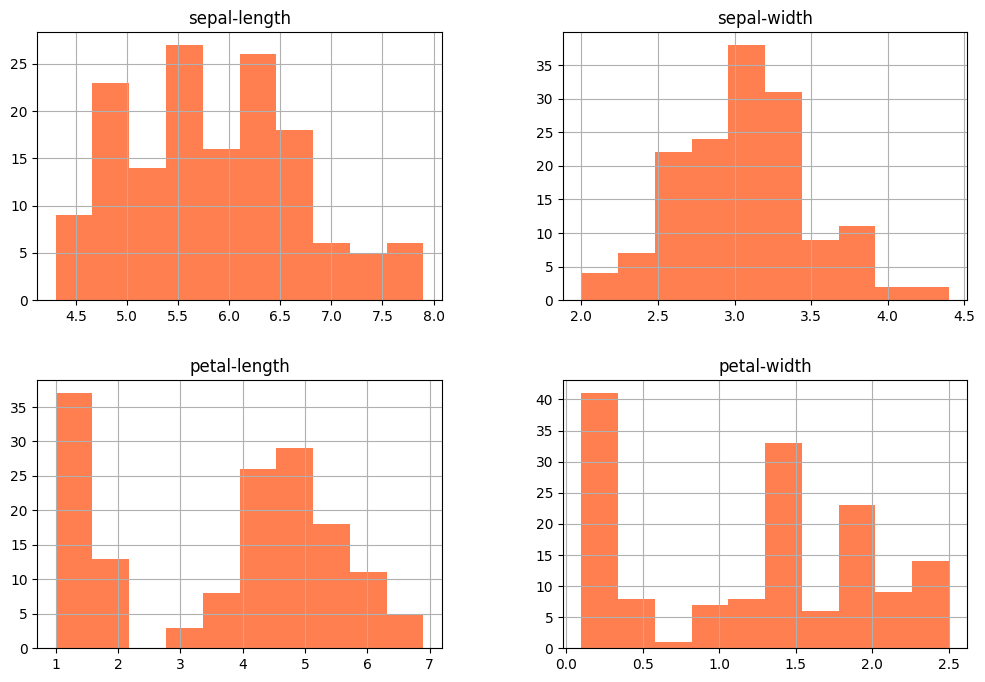

In [ ]:
numerical_attributes = df.select_dtypes(include=['float'])
numerical_attributes.hist(figsize=(12,8), color = 'coral')

In [ ]:
def add_label(ax):
  for label in ax.containers:
    ax.bar_label(label)

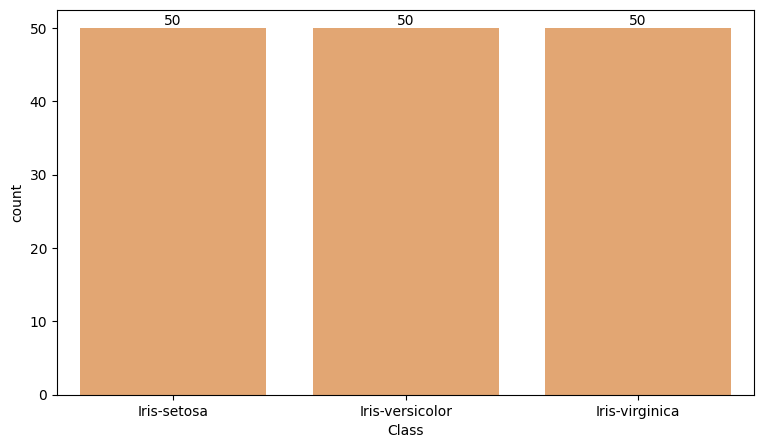

In [ ]:
data_class = df.select_dtypes(include=['object'])
plt.figure(figsize=(9,5))
dc = sns.countplot(data = data_class, x = "Class", color = 'sandybrown')
add_label(dc)
plt.show()

<Axes: xlabel='Class', ylabel='sepal-length'>

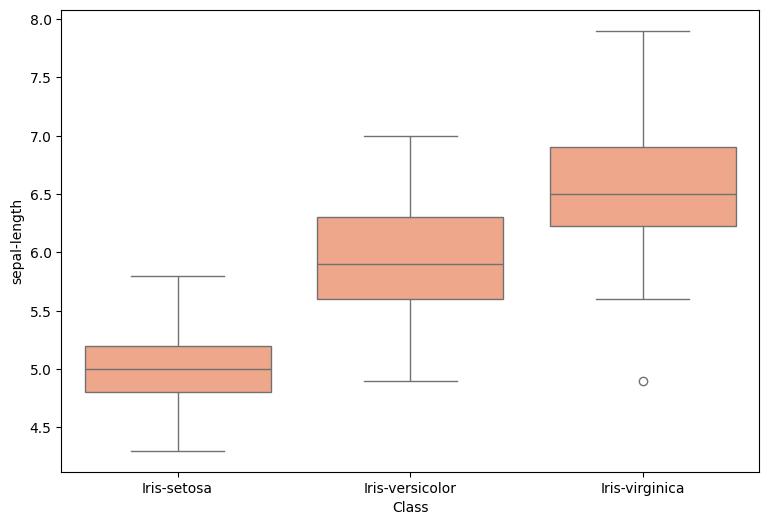

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x="Class",y="sepal-length", color = "lightsalmon", data=df)

<Axes: xlabel='Class', ylabel='sepal-width'>

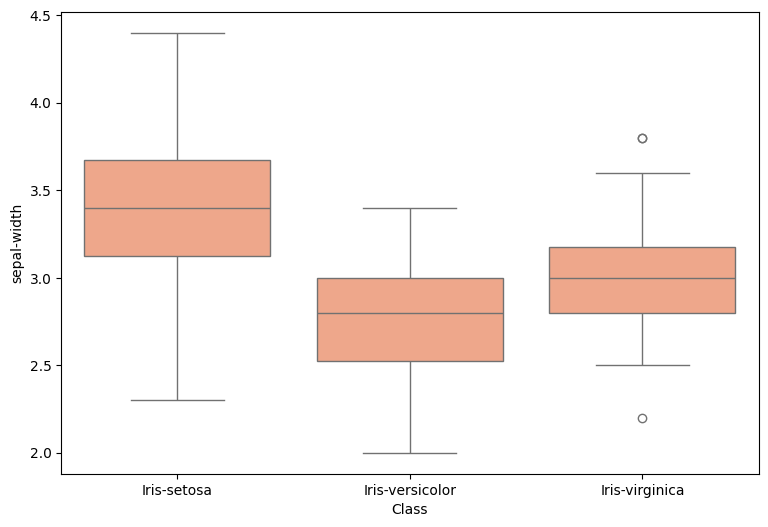

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x="Class",y="sepal-width", color = "lightsalmon", data=df)

<Axes: xlabel='Class', ylabel='petal-length'>

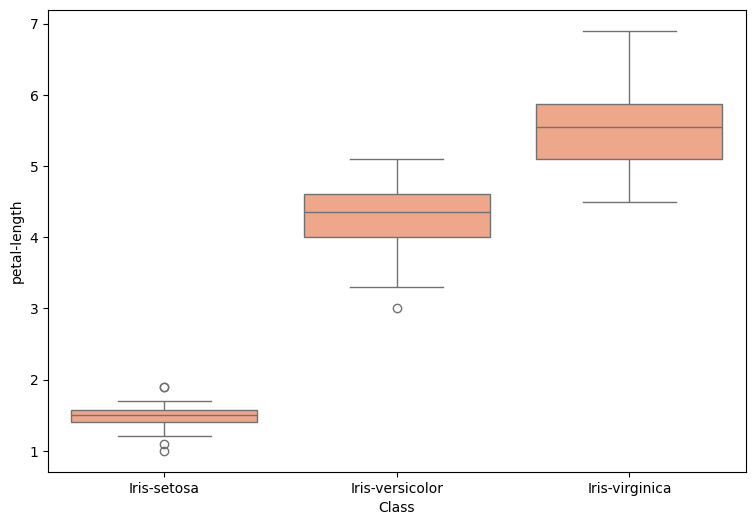

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x="Class",y="petal-length", color = "lightsalmon", data=df)

<Axes: xlabel='Class', ylabel='petal-width'>

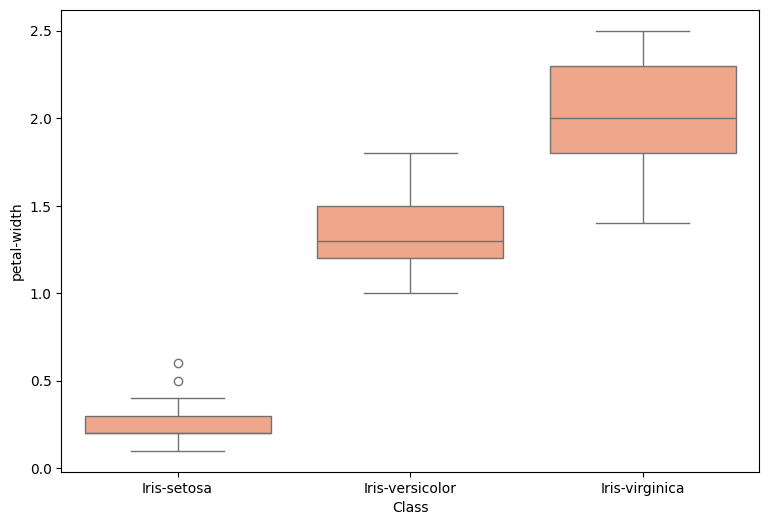

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x="Class",y="petal-width", color = "lightsalmon", data=df)

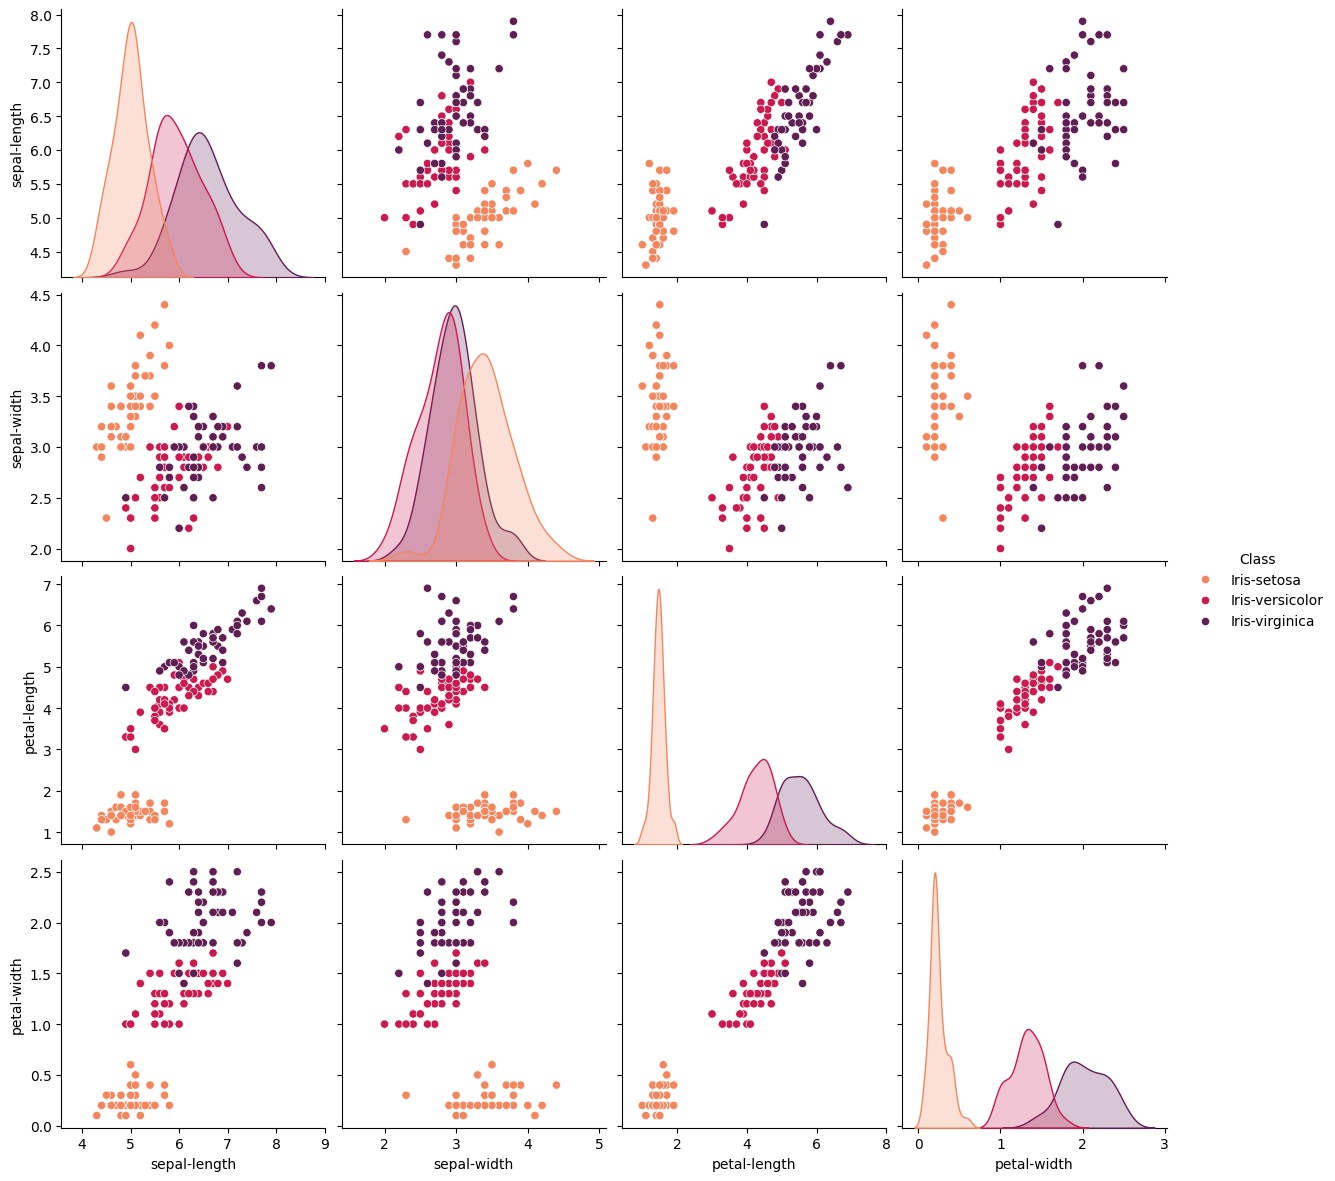

In [ ]:
sns.pairplot(df, height=3, diag_kind = 'kde', hue='Class', palette="rocket_r")

Text(0.5, 1.05, 'Data Correlation of Features')

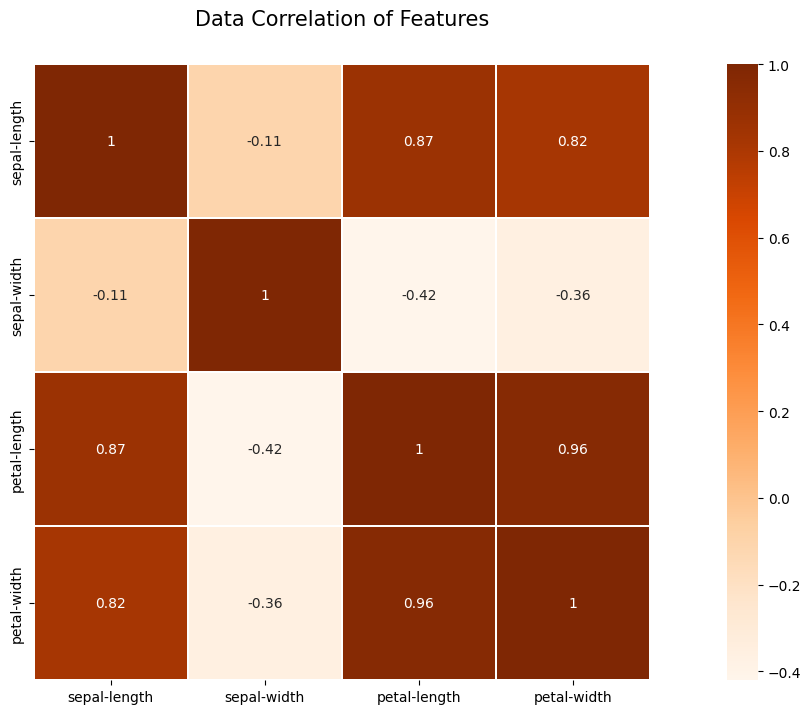

In [ ]:
corr = numerical_attributes.corr()
f, ax = plt.subplots(figsize=(20, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="Oranges", square=True, ax = ax, annot=True, linewidth = 0.1)
plt.title('Data Correlation of Features', y=1.05, size=15)

#Random Data

In [ ]:
#Test data spliting
np.random.seed(10)
samples = np.random.choice(df.index, 10, replace=False)
df_test = df.loc[samples]
df = df.drop(samples)

In [ ]:
df.describe().round(2)

,sepal-length,sepal-width,petal-length,petal-width
count,140.00,140.00,140.00,140.00
mean,5.85,3.07,3.77,1.21
std,0.84,0.42,1.78,0.77
min,4.30,2.20,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.43,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


array([[<Axes: title={'center': 'sepal-length'}>,
        <Axes: title={'center': 'sepal-width'}>],
       [<Axes: title={'center': 'petal-length'}>,
        <Axes: title={'center': 'petal-width'}>]], dtype=object)

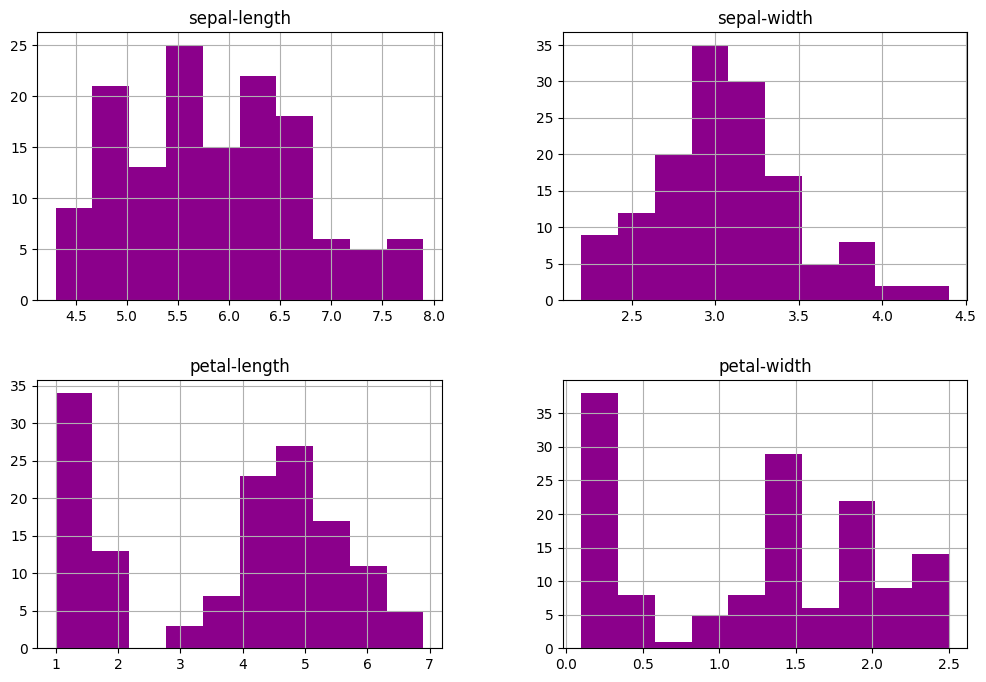

In [ ]:
numerical_attributes = df.select_dtypes(include=['float'])
numerical_attributes.hist(figsize=(12,8), color = 'DarkMagenta')

In [ ]:
df_test.describe().round(2)

,sepal-length,sepal-width,petal-length,petal-width
count,10.00,10.00,10.00,10.00
mean,5.71,2.84,3.57,1.00
std,0.56,0.52,1.53,0.61
min,5.00,2.00,1.40,0.20
25%,5.18,2.55,2.00,0.40
50%,5.75,2.75,4.25,1.15
75%,6.25,3.22,4.57,1.38
max,6.40,3.70,5.30,1.90


array([[<Axes: title={'center': 'sepal-length'}>,
        <Axes: title={'center': 'sepal-width'}>],
       [<Axes: title={'center': 'petal-length'}>,
        <Axes: title={'center': 'petal-width'}>]], dtype=object)

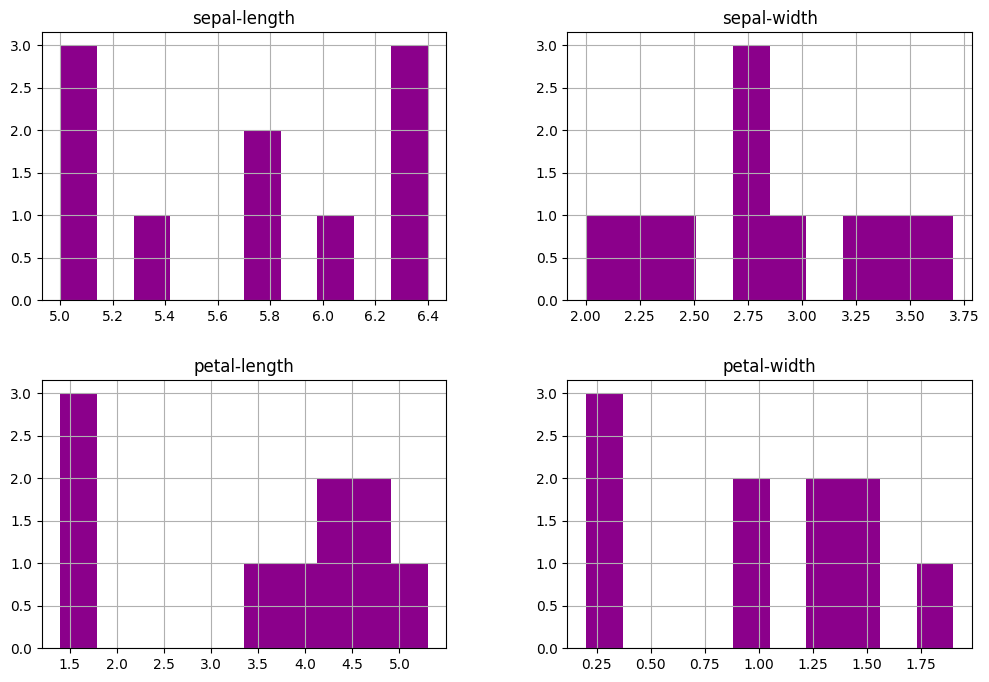

In [ ]:
numerical_attributes = df_test.select_dtypes(include=['float'])
numerical_attributes.hist(figsize=(12,8), color = 'DarkMagenta')

#Train the 1st model

In [ ]:
#Fit the CART model
model = DecisionTreeClassifier()
model = model.fit(df[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']], df.Class)
model.score(df[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']], df.Class)

1.0

In [ ]:
model.score(df_test[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']], df_test.Class)

1.0

##Visualising the model

In [ ]:
def add_label(ax):
  for label in ax.containers:
    ax.bar_label(label)

<ipython-input-27-d02d65c1fcf6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  m = sns.barplot(x=model.feature_names_in_, y=[i*100 for i in feature_importances],palette="cubehelix")


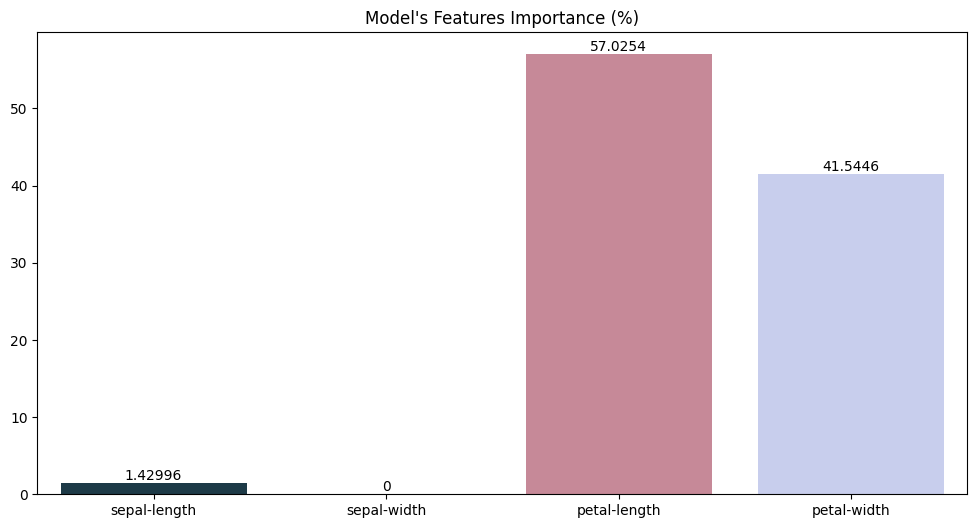

In [ ]:
# Get feature importances
feature_importances = model.feature_importances_

plt.figure(figsize=(12, 6))
plt.title("Model's Features Importance (%)")
m = sns.barplot(x=model.feature_names_in_, y=[i*100 for i in feature_importances],palette="cubehelix")
add_label(m)
plt.show()

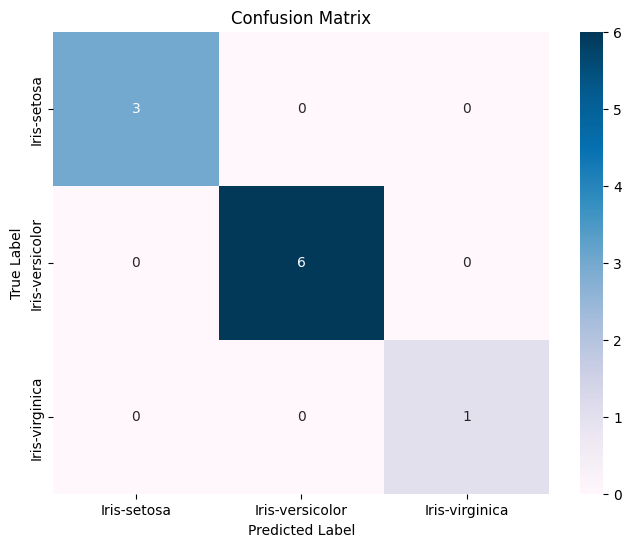

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(df_test[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']])

# Create a confusion matrix
cm = confusion_matrix(df_test.Class, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="PuBu", xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
df.columns[3]

'petal-width'

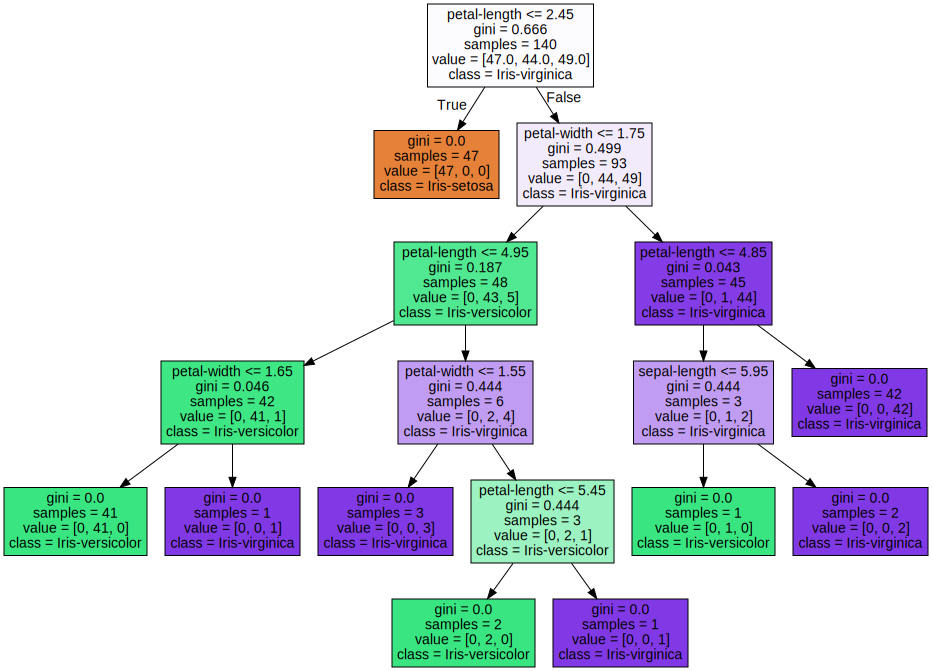

In [ ]:
dot_data = export_graphviz(model, out_file=None,feature_names=df.columns[:4], class_names=model.classes_, filled=True)
graph = graphviz.Source(dot_data)
graph

#Train the 2nd model

In [ ]:
#Fit the CART model
model = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=4)
model.fit(df[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']], df.Class)
model.score(df[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']], df.Class)

0.9714285714285714

In [ ]:
model.score(df_test[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']], df_test.Class)

1.0

##Visualising the model

In [ ]:
def add_label(ax):
  for label in ax.containers:
    ax.bar_label(label)

<ipython-input-35-d02d65c1fcf6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  m = sns.barplot(x=model.feature_names_in_, y=[i*100 for i in feature_importances],palette="cubehelix")


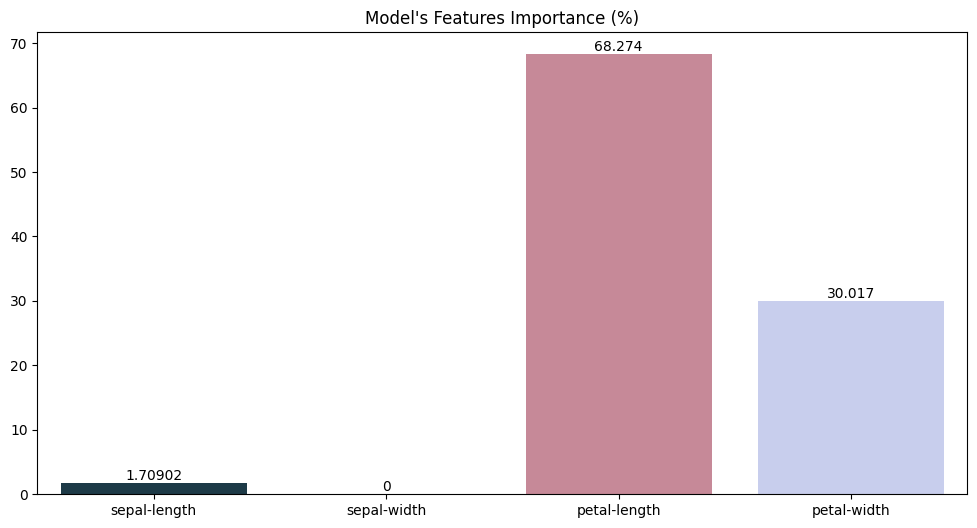

In [ ]:
# Get feature importances
feature_importances = model.feature_importances_

plt.figure(figsize=(12, 6))
plt.title("Model's Features Importance (%)")
m = sns.barplot(x=model.feature_names_in_, y=[i*100 for i in feature_importances],palette="cubehelix")
add_label(m)
plt.show()

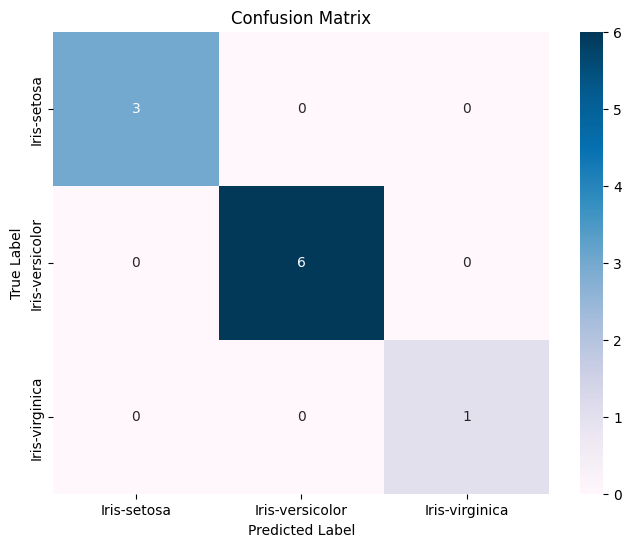

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(df_test[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']])

# Create a confusion matrix
cm = confusion_matrix(df_test.Class, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="PuBu", xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
df.columns[3]

'petal-width'

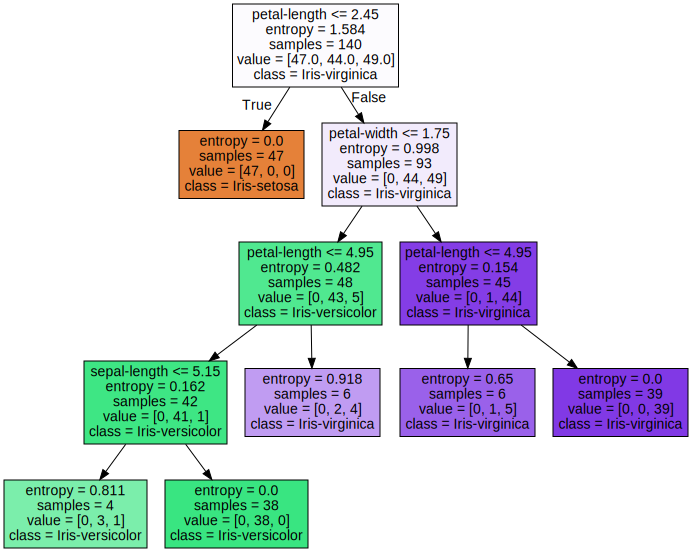

In [ ]:
dot_data = export_graphviz(model, out_file=None,feature_names=df.columns[:4], class_names=model.classes_, filled=True)
graph = graphviz.Source(dot_data)
graph